box plot 추가

# 시각화 모듈 seaborn
`matplotlib`을 기반으로 만들어진 모듈로 직관적인 인터페이스를 갖고 있다.  
- https://seaborn.pydata.org/

In [1]:
import seaborn as sns
import pandas as pd 
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False   # 한글 마이너스 깨짐 방지

## 데이터셋 다운로드
seaborn이 제공하는 연습용 데이터 셋
- fMRI는 다양한 위치에서 뇌의 평면 자료들을 시간의 흐름에 따라 나열해놓은 데이터

In [2]:
fmri = sns.load_dataset("fmri")

In [3]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [4]:
fmri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    1064 non-null   object 
 1   timepoint  1064 non-null   int64  
 2   event      1064 non-null   object 
 3   region     1064 non-null   object 
 4   signal     1064 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


유일한 (`unique`) 데이터 확인하기

## 라인 차트 (lineplot)

`seaborn` 모듈의 라인차트는 `lineplot` 메서드를 사용합니다. 해당 메서드로 `x`, `y`, `data` 값을 입력해야 합니다.

다음 코드는  `fmri` 데이터프레임의 `timepoint` 컬럼을 X축에 `signal` 컬럼을 Y축에 그립니다. 
- 신뢰 구간 (confidence interval)이 함께 그려짐

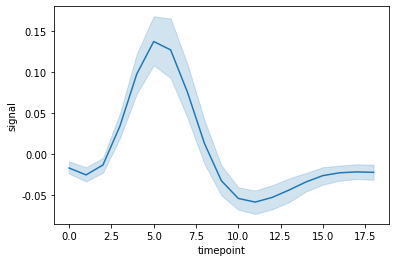

In [4]:
sns.lineplot(x='timepoint', y='signal', data=fmri)

데이터프레임의 시각화 방법과의 차이 비교

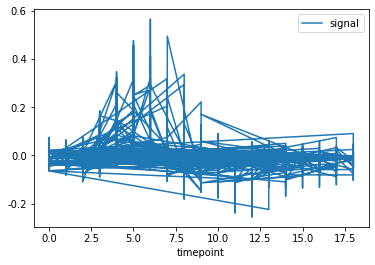

In [5]:
fmri.plot.line(x='timepoint', y='signal')

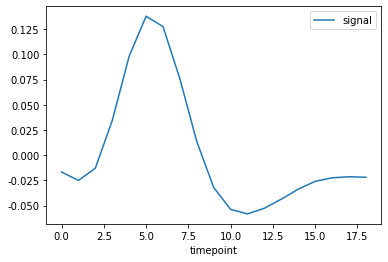

In [6]:
fmri.groupby("timepoint").agg({'signal':np.mean}).plot.line()

###### 신뢰구간 계산해 보기
$\overline{x} \ \pm Z  \tfrac{s}{\sqrt{n}}$
----
$ \overline{x} $ : mean  
z : Z-value (1.96 for 95%)  
s : standard deviation  
n : number of observation  

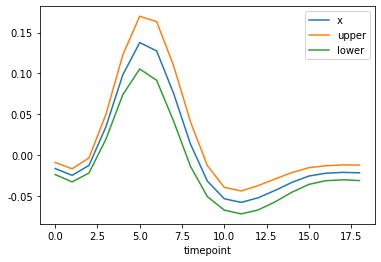

In [19]:
x = fmri.groupby("timepoint").agg({'signal':np.mean})
s = fmri.groupby("timepoint").agg({'signal':np.std})
n = fmri.groupby("timepoint").agg({'signal':len})

u = x + 1.96 * (s / (n**0.5))
l = x - 1.96 * (s / (n**0.5))

t = pd.concat([x,u,l], axis=1)
t.columns=['x', 'upper', 'lower']
t.plot.line() # 컬럼별로 그래프 그려주니까 위에서 concat, axis=1 한거얌.

### 카테고리 분류
`event` 컬럼의 `stim`과 `cue`를 분류해서 `timepoint`와 `signal`을 그려봅시다. `lineplot`을 두 번 호출하면 두 개의 그래프가 함께 그려집니다. 

`hue`는 카테고리 나눠서 각각의 차트를 한 번에 그려줍니다.

`subject` 별로 `timepoint`와 `signal`의 관계를 라인 차트로 표현해 보세요.

<div class="alert alert-warning"> seaborn에서는 구분 데이터를 단일 컬럼에 저장해 놔야합니다.  </div>

기존 데이터프레임에서는 차트로 그려질 구분 데이터를 독립 컬럼으로 표현해야 했습니다. 위와 같은 시각화 결과를 데이터프레임의 `plot.line` 메서드로 표현해 봅시다. 

인덱스 하나를 열로 이동합니다. 

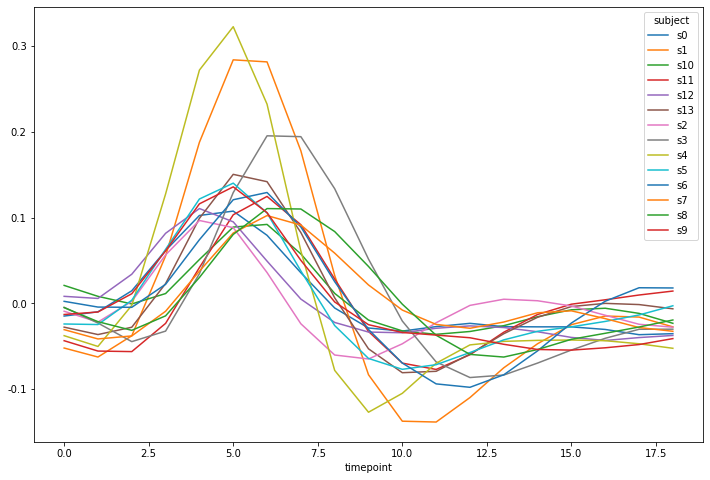

In [28]:
t = fmri.groupby(['subject', 'timepoint']).agg({'signal':np.mean})
t.head()
t.unstack(level=0)['signal'].plot.line(figsize=(12,8))

`pivot_table` 함수를 사용할 수도 있습니다. 

###### 연습 문제
환자(x축)와 signal(y축)의 관계를 라인 차트로 그려라.

In [29]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


위 차트를 측정 위치별로 나눠 그려봅시다.
- `parietal`, `frontal`

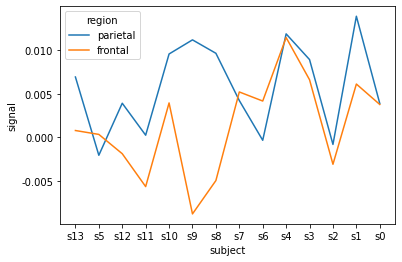

In [34]:
sns.lineplot(x='subject', y='signal', data=fmri, hue='region', ci=None)

환자별(x축) 별 signal의 최솟값(y축)을 시각화하라.

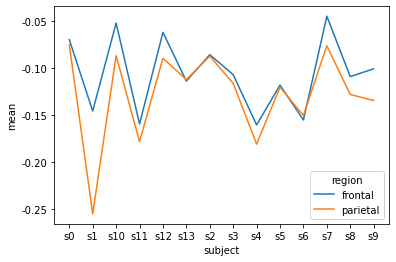

In [51]:
# cf.sns의 기본값은 평균값임.
t = fmri.groupby(['subject','region']).agg(mean=('signal','min'))
t = t.reset_index()
t.sort_values('subject')
sns.lineplot(x='subject', y='mean', data=t, hue='region')

`seaborn`의 기능을 알고 있다면 쉽게 문제를 해결할 수 있습니다. 
- `estimator`

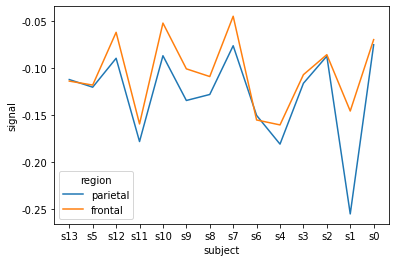

In [53]:
sns.lineplot(x='subject', y='signal', data=fmri, hue='region', ci=None, estimator='min')

`event` 별로 구분하기 

다음을 참고하면 데이터의 순서대로 X축에 그려지는 것을 알 수 있습니다.
- `subject` 컬럼에 보여지는 순서와 같이 차트로 시각화됩니다. 

In [ ]:
fmri.head()

`subject`를 정렬하면 정상적으로 되는 것처럼 보입니다. 하지만 `s10`, `s11`, `s12`, `s13`이 제대로 정렬되지 않습니다. 

In [ ]:
fmri.sort_values('subject')

숫자 순서대로 정렬하기 
- 데이터 타입이 문자열이라서 `s1` 다음 `s10` 순서로 정렬됩니다.
- `s` 뒤의 숫자를 추출해서 형변환 후 정렬해 봅시다.

In [ ]:

f

In [ ]:
sns.lineplot(x="subject", y="signal", data=f)

`seaborn` 모듈은 다양한 시각화 방법을 제공합니다.
- https://seaborn.pydata.org/tutorial.html

In [ ]:
sns.barplot(x="subject", y="signal", data=fmri)

## boxplot

In [ ]:
sns.boxplot(data=fmri)

## countplot

In [ ]:
sns.countplot(x='subject', data=fmri)

## FacetGrid
하나의 데이터를 여러 차트로 나눠 그릴 때 사용합니다. 

In [55]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


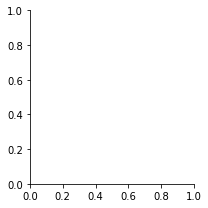

In [56]:
sns.FacetGrid(fmri)

`map` 메서드로 시각화할 함수와 데이터를 전달합니다. 

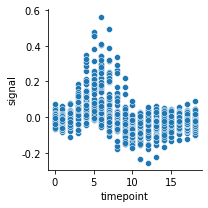

In [57]:
g = sns.FacetGrid(fmri)
g.map(sns.scatterplot, 'timepoint', 'signal')

`col` 파라미터는 가로축으로 분류할 기준을 지정합니다. 다음 코드는 환자별로 구분해서 데이터를 시각화합니다.

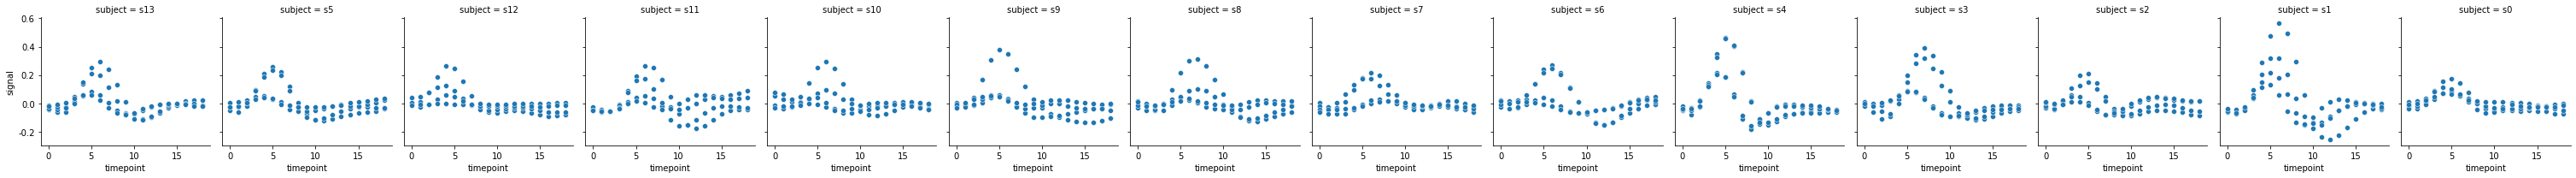

In [58]:
g = sns.FacetGrid(fmri, col='subject')
g.map(sns.scatterplot, 'timepoint', 'signal')

한 라인에 표현될 차트는 `col_wrap` 변수로 지정합니다.

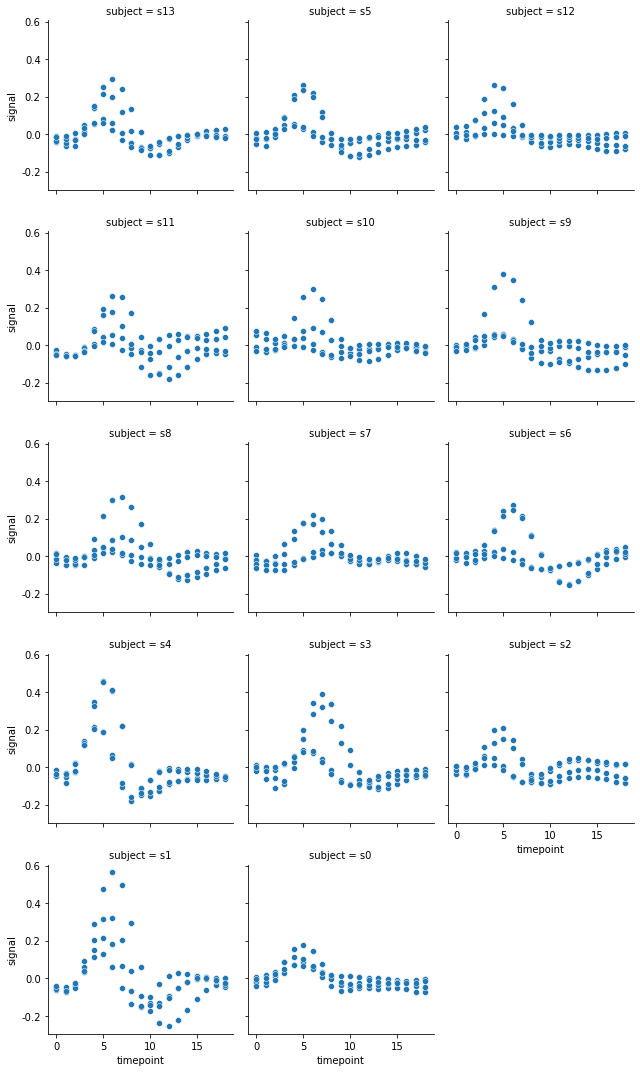

In [59]:
g = sns.FacetGrid(fmri, col='subject', col_wrap=3)
g.map(sns.scatterplot, 'timepoint', 'signal')

`sharex`와 `sharey` 변수는 `x` 축과 `y` 축의 공유 여부를 결정합니다. default `True`입니다.

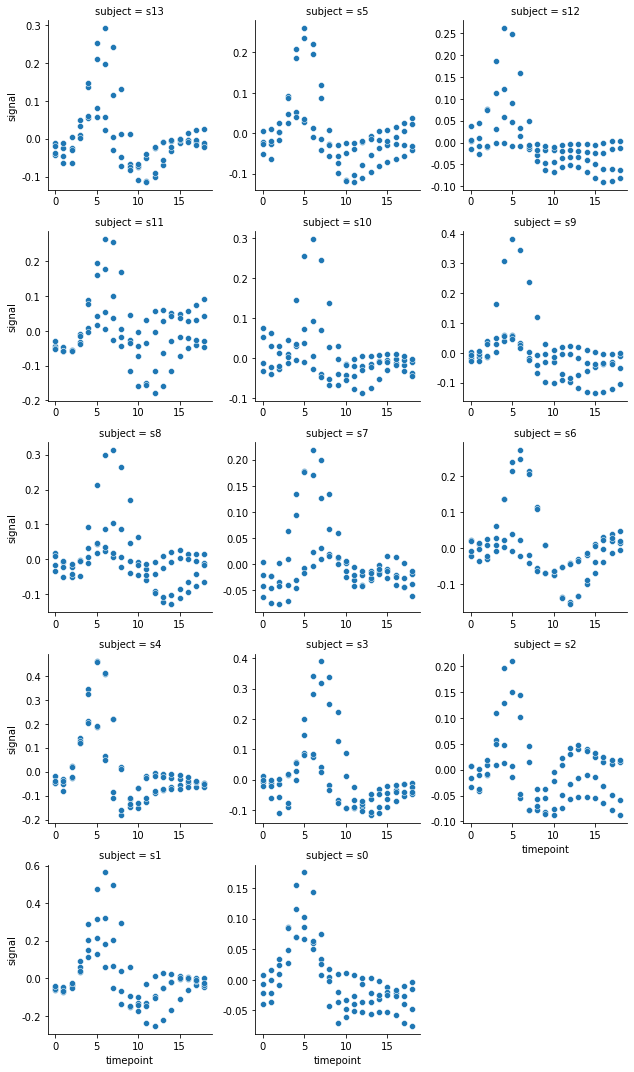

In [60]:
g = sns.FacetGrid(fmri, col='subject', col_wrap=3, sharey=False, sharex=False)
g.map(sns.scatterplot, 'timepoint', 'signal')

### 연습 문제
매일 같이 사고 팔았을 경우의 누적 수익률을 라인 차트로 표현하라.

In [61]:
!pip install pykrx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 93 kB 1.3 MB/s 
     |████████████████████████████████| 51 kB 374 kB/s 
     |████████████████████████████████| 251 kB 40.9 MB/s 


In [62]:
from pykrx import stock

a = stock.get_market_ohlcv_by_date("20210101", "20210630", "005930")

No Korean fonts found. Please install the font shown belowbecause Hangul can be broken on the chart.
 - NanumBarunGothic font is required.

    1) font install

    !sudo apt-get install -y fonts-nanum
    !sudo fc-cache -fv
    !rm ~/.cache/matplotlib -rf

    2) runtime restart if colab
    
PYKRX works fine regardless of font installation.


삼성전자(`005930`)와 삼성증권(`016360`) 차트 그리기

In [63]:
a = stock.get_market_ohlcv_by_date("20210101", "20210630", "005930")
b = stock.get_market_ohlcv_by_date("20210101", "20210630", "016360")

두 번 `lineplot`을 호출

In [64]:
a.head()

,시가,고가,저가,종가,거래량
날짜,,,,,
2021-01-04,81000,84400,80200,83000,38655276
2021-01-05,81600,83900,81600,83900,35335669
2021-01-06,83300,84500,82100,82200,42089013
2021-01-07,82800,84200,82700,82900,32644642
2021-01-08,83300,90000,83000,88800,59013307


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text

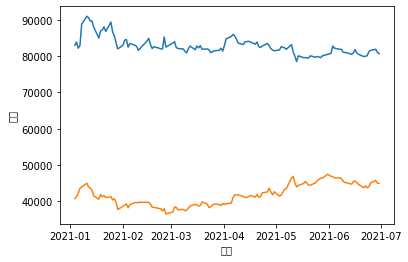

In [66]:
sns.lineplot(x=a.index, y='종가', data=a)
sns.lineplot(x=b.index, y='종가', data=b)

하나의 `DataFrame`으로 구성 후 그리기 (연습의 목적)

In [67]:
a['name'] = '005930'
b['name'] = '016360'
c = pd.concat([a, b])
c.head()

,시가,고가,저가,종가,거래량,name
날짜,,,,,,
2021-01-04,81000,84400,80200,83000,38655276,005930
2021-01-05,81600,83900,81600,83900,35335669,005930
2021-01-06,83300,84500,82100,82200,42089013,005930
2021-01-07,82800,84200,82700,82900,32644642,005930
2021-01-08,83300,90000,83000,88800,59013307,005930


In [73]:
c = c.reset_index()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text

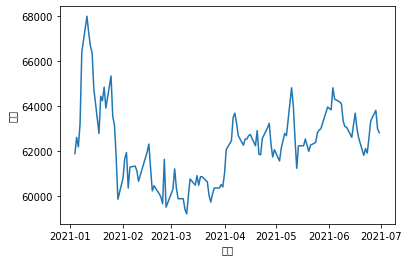

In [75]:
sns.lineplot(x='날짜', y='종가', data=c, ci=None)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text

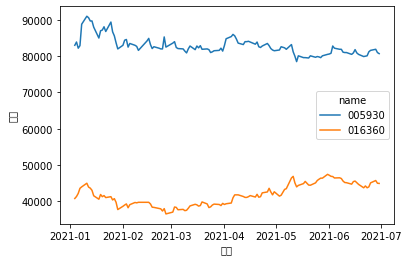

In [76]:
sns.lineplot(x='날짜', y='종가', data=c, hue='name')

## 참고자료

### multi axes
스케일이 다른 그래프를 그릴 때 사용하는 방법

In [ ]:
ss = stock.get_market_ohlcv_by_date("20210101", "20210630", "005930")
ss['수익률'] = (ss['종가'] / ss['시가']).cumprod()
sns.lineplot(x=ss.index, y="종가", data=ss)
sns.lineplot(x=ss.index, y="수익률", data=ss)

`twinx` 메서드로 새로운 축을 생성

In [ ]:
ax1 = sns.lineplot(x=ss.index, y="종가", data=ss)
ax2 = ax1.twinx()
sns.lineplot(x=ss.index, y="수익률", data=ss, ax=ax2, color='r')

### 연습 문제
전일 상승마감 했다면 다음날 시가에사서 종가에 매도할 경우의 수익률과 종가를 시각화하라.

In [ ]:
ss = stock.get_market_ohlcv_by_date("20210101", "20210630", "005930")

In [ ]:
cond = ss['종가'].shift(1) > ss['시가'].shift(1)
ss['수익'] = np.where(cond, ss['종가']/ss['시가'], 1)
ss.head()

In [ ]:
ss['누적'] = ss['수익'].cumprod()

In [ ]:
ax1 = sns.lineplot(x=ss.index, y='종가', data=ss)
ax2 = ax1.twinx()
sns.lineplot(x=ss.index, y='누적', data=ss, ax=ax2, color='r')

### Figure 저장하기

In [ ]:
ax1 = sns.lineplot(x=ss.index, y="종가", data=ss)
ax2 = ax1.twinx()
sns.lineplot(x=ss.index, y="누적", data=ss, ax=ax2, color='r')
plt.savefig('a.png')

### 스타일 지정하기

그래프 색상

In [ ]:
sns.lineplot(x=ss.index, y='종가', data=ss, color='#ff0000')

In [ ]:
std = ss['종가'].std()
ss['lower'] = ss['종가'] - 2 * std
ss['high'] = ss['종가'] + 2 * std
sns.lineplot(x=ss.index, y='lower', data=ss, color='#ff0000')
sns.lineplot(x=ss.index, y='종가', data=ss, color='#0000ff')
sns.lineplot(x=ss.index, y='high', data=ss, color='#00ff00')

컬러 팔레트  
- 미리 정의된 색상 셋트를 사용 (<a href="https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html" target="_blank"> 참고 </a>)

In [ ]:
p = sns.color_palette('Paired',3)
p

In [ ]:
sns.lineplot(data=ss[['lower', 'high', '종가']], palette=p)

마커 (`marker`) 지정하기
- `s`, `o`, `*`, `+`

In [ ]:
sns.lineplot(x=ss.index, y="종가", marker='o', data=ss)

선 모양 지정하기 
- `-`, `--`, `:`, `-.`

In [ ]:
sns.lineplot(x=ss.index, y="종가", linestyle=":", data=ss)

선 두께 지정하기
- `linewidth`

In [ ]:
sns.lineplot(x=ss.index, y="종가", linewidth=3, data=ss)

제목

In [ ]:
ax = sns.lineplot(x=ss.index, y="종가", data=ss)
ax.set_title('삼성전자(005930)', fontdict= { 'fontsize': 24, 'fontweight':'bold'}, y=0.8)

seaborn이 제공하는 다섯 가지 테마 
- `darkgrid`, `whitegrid`, `dark`, `white`, `ticks`

In [ ]:
sns.set_style('whitegrid')
sns.set_style({'font.family':'Malgun Gothic'})
sns.lineplot(x=ss.index, y="종가", data=ss) 

In [ ]:
sns.set_style( 'white', {'font.family':'Malgun Gothic'})
sns.lineplot(x=ss.index, y="종가", data=ss) 

테두리 제거 하기
- https://seaborn.pydata.org/tutorial/aesthetics.html?highlight=styles

In [ ]:
sns.lineplot(x=ss.index, y="종가", data=ss) 
sns.despine(left=False, bottom=False, top=True, right=True)

In [ ]:
ax = sns.lineplot(x=ss.index, y="종가", data=ss) 
ax.set_axis_off()

In [ ]:
ax = sns.lineplot(x=ss.index, y="종가", data=ss) 
ax.set_title('삼성전자(005930)', fontdict= { 'fontsize': 14, 'fontweight':'bold'}, y=0.8)
ax.set_axis_off()

축 제목

In [ ]:
ax = sns.lineplot(x=ss.index, y="종가", data=ss) 
ax.set_ylabel("Close", fontsize=25)
ax.set_xlabel("Date", fontsize=20)
sns.despine()

`Figure` 크기 수정

In [ ]:
plt.figure(figsize=(20,5))
sns.lineplot(x=ss.index, y="종가", data=ss) 